# Analysis of World Happiness From 2015-2019

### Ambika Sikri 

*** 

## Introduction 

Ranging in culture, language, climate, and much more, our planet hosts close to 200 sovereign and unique nations. Yet, despite the many distinction of various regions, there are common threads that span throughout the globe linking individuals together on common human experiences. In a year that has arguably been one of the most trying in recent history for persons of all nations, I thought it would be interesting to research and dive deeper into a more positive shared human exerpeince that has been tracked globally throughout the years. 

Happiness is one of the most complex human emotions whose fluctuation can be influenced by countless factors. [The World Happiness Report](https://worldhappiness.report/archive/) is a product of a joint mission of the United Nations and [Gallup](https://news.gallup.com/poll/266057/gallup-global-happiness-center.aspx) to "demonstrate that wellbeing and happiness are critical indicators of a nation's economic and social development". The World Happiness Report gathers its data from data collected anually by the Gallup World Poll - a global survey that compiles responses to evaluative questions about life. 

The GWP Survey records the average value for each nation for a list of questions. The questions and variables to which our project will refer to are the following: 

> __Happiness__: "Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” 

> __Social support__: "having someone to count on in times of trouble", via binary responses of either 0 or 1 to the question "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?" 

> __Freedom to make life choices__: "Are you satisfied or dissatisfied with your freedom to choose what you do with your life?" 

> __Corruption Perception__ (binary responses): “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”

> __Generosity__ is measured by Gallup as the residual of regressing national average of the question: "Have you donated money to a charity in the past month" on GDP per capita. 

> __GDP per capita__ and __Health(Life Expectancy)__ data arecollected from World Development Indicators and the World Health Organization. 
Other data sources and variables were included both in the GWP survey and WHRs but won't be discussed or used for the purposes of this project. 

Throughout the course of this project, we will take a look at how residents of various countries have manifested Happiness in recent years through differing settings. We will use the various data from the World Happiness Report in our analysis to draw conclusions as to whether the earlier discussed variables undertake roles as indicators of Happiness throughout the world. 

***

## Libraries

We will begin our project by importing the following python libraries that will be necessary for executing our project: 

1. The [pandas](https://pandas.pydata.org/docs/reference/index.html#api) library is popularly used for easily manipulating and analyzing data through through dataframe and series objects. Our [data](https://www.kaggle.com/mathurinache/world-happiness-report) is in tabular form, so we will certainly need such functionalities for our analysis. 

2. From the [matplotlib](https://matplotlib.org/) plotting library, we will import the [pyplot interface](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.html) for our data visualization step to plot various graphs to gain a more holistic understanding of our data.  

3. The [Scikit-learn](https://scikit-learn.org/stable/modules/classes.html) library is popularly used for predicitive data analysis. We will utilize this library for our machine learning step by building regression models and assessing the accuracy of them. 

4. The [np](https://numpy.org/) library is used to manipulate arrays and will use when necessary in our project for data storage. The [re](https://docs.python.org/3/library/re.html) module will be used to apply regular expression matchings in strings. 

In [62]:
#Library imports 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import re

***
#### List of Colors Used For Data Visualization


In [63]:
#List of colors used for countries 
c = ['aqua', 'palevioletred', 'yellowgreen', 'mediumvioletred', 'sienna', 'thistle', 'gray', 'royalblue', 'plum', 
     'purple', 'lightpink', 'magenta', 'black', 'blue', 'cadetblue', 'chartreuse', 'burlywood', 'brown', 'blueviolet',
     'chocolate', 'coral', 'cornflowerblue', 'crimson', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgreen', 'darkkhaki', 
     'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkslateblue', 'deepskyblue',
     'darkviolet', 'dodgerblue', 'indianred', 'indigo', 'hotpink', 'maroon']

#Colors used for Africa, Asia, Europe, North America, Oceania and South America 
continent_colors = ['deeppink', 'darkorchid', 'darkblue', 'deepskyblue','teal', 'turquoise']

#Colors used for GDP per capita, Social support, Health (Life Expectancy), Freedom to make life choices, 
#Perceptions of corruption and Generosity 
my_colors = ['steelblue', 'indigo',  'deepskyblue', 'blue', 'teal', 'mediumturquoise', 'darkblue']

#Colors used for graphs pertaining to max Happiness Score values by Country
colors = ['darkblue', 'mediumblue', 'cornflowerblue', 'darkslateblue', 'mediumslateblue']
colors2 = ['mediumslateblue', 'darkslateblue', 'steelblue', 'dodgerblue', 'skyblue']

***
## Data Collection


The first step in the data science pipeline, is data collection. This step is important in setting the foundation of a data science project and it is important that we understand the direction of our project and find data that ties strongly to the goal of our project. We already determined that the most appropriate dataset for our analysis of Happiness around the world will come from the World Happiness Reports from 2015-2019. Our [data](https://www.kaggle.com/mathurinache/world-happiness-report) was gathered on [Kaggle](https://www.kaggle.com/datasets) but another way to obtain it would have been directly from the [World Happiness Report website](https://worldhappiness.report/) for each year. 

 

We begin our data collection by downloading the World Happiness Report datasets from years 2015-2019 as csv files and storing them locally. We then read each dataset in using pandas read_csv function, storing data in local pandas dataframes.



In [64]:
#Displays top 5 rows of 2015's WHR Report as obtained from original dataset
WHR_2015 = pd.read_csv('2015.csv') 
WHR_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [65]:
#Displays top 5 rows of 2016's WHR Report as obtained from original dataset
WHR_2016 = pd.read_csv('2016.csv')
WHR_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [66]:
#Displays top 5 rows of 2017's WHR Report as obtained from original dataset
WHR_2017 = pd.read_csv('2017.csv')
WHR_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [67]:
#Displays top 5 rows of 2018's WHR Report as obtained from original dataset
WHR_2018 = pd.read_csv('2018.csv') 
WHR_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [68]:
#Displays top 5 rows of 2019's WHR Report as obtained from original dataset
WHR_2019 = pd.read_csv('2019.csv')
WHR_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Data Tidying

As the World Happiness Report & Gallup World Survey evolved through the years, survey questions were added, previous ones were modified and variable names that were used to model the data changed. So, needless to say, not all the data that we have downloaded from the WHRs will be used in our project. As these changes are natural with surveys and data collection, a cleanup of the data on our end is also as inevitable. A component of the data collection step is data tidying which entails organizing data in a concise clear manner that makes it easily processed for view and analysis. 

For us, the tidying component mostly requires determining which variables that are housed in the columns of the 5 dataframes will play a role in our analysis of Happiness and potential Happiness indicators.  Any variables that we deem unneccessary for our project will be eliminated from the data tables. We will go ahead and eliminate columns pertaining to confidence intervals and standard error as these are statistics that weren't included in each WHR (therefore an inconsistency) and are also unneeded in our examination of world happiness. Similarly, rank variables and their corresponding data are going to be discarded as we will create our own criteria for analysis and comparison between the data. 

Then the remaining columns will house the same variables between the five tables, a standardization that will make all comparisons and analysis between the years much simpler. Data collected from the earlier years termed data pertaining to "Social support" as "Family", whereas in 2018 and 2019 values pertaining to this sentiment were labeled as "Social support". To keep this label constant throughout the years, each data table was update to use the most recent terms for this category and a few others. 

Across the 5 years, we will choose to keep the following 7 variables as the information needed to continue with out project: the "__Happiness Score__" as collected by the Gallup survey, the country's "__GDP per capita__", respondents' sentiments regarding the "__Social support__" that they have, the country's average life expectancy - "__Health(Life Expectancy)__" , respondents' sentiments regarding their "__Freedom to make life choices__" in their country, respodents' "__Perception of corruption__" in their country, and respondents' contributions to charities - "__Generosity__".

In [69]:
#Dropping columns from each dataframe that hold miscallaneous information irrelevant to our project 
WHR_2015.drop(['Happiness Rank','Region', 'Standard Error', 'Dystopia Residual'], axis = 1, inplace = True)

WHR_2016.drop(['Happiness Rank', 'Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], 
              axis = 1, inplace = True)

WHR_2017.drop(['Happiness.Rank', 'Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis = 1, inplace = True)

WHR_2018.drop(['Overall rank'], axis = 1, inplace = True)

WHR_2019.drop(['Overall rank'], axis = 1, inplace = True)


#Standardizing the dataframes to hold 8 columns of information for each country stored in their 
WHR_2015.rename(columns = {'Family': 'Social support', 'Freedom': 'Freedom to make life choices', 
                           'Trust (Government Corruption)': 'Perceptions of corruption', 
                           'Economy (GDP per Capita)': 'GDP per capita'}, inplace = True)

WHR_2016.rename(columns = {'Family': 'Social support', 'Freedom': 'Freedom to make life choices', 
                           'Trust (Government Corruption)': 'Perceptions of corruption',
                           'Economy (GDP per Capita)': 'GDP per capita'}, inplace = True)

WHR_2017.columns = ['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Social support', 
                    'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)', 'Generosity']

WHR_2017.rename(columns = {'Freedom': 'Freedom to make life choices', 'Economy (GDP per Capita)': 'GDP per capita', 
                           'Trust (Government Corruption)': 'Perceptions of corruption'}, inplace = True)

WHR_2018.rename(columns = {'Score': 'Happiness Score', 'Country or region': 'Country', 
                           'Healthy life expectancy': 'Health (Life Expectancy)'}, inplace = True)

WHR_2019.rename(columns = {'Score': 'Happiness Score', 'Country or region': 'Country', 
                           'Healthy life expectancy': 'Health (Life Expectancy)'}, inplace = True)

*** 

## Data Processing

The data processing phase of the pipeline is a very important step in data science projects. This step involves interaction with the data and best prepare it for data visualization and analysis. 

It's starting to become clear that the data from each of the years aren't as valuable on their own as they are as a set. Since each year contains data that pertains to the same attributes for a mostly standard set of countries, the data will be consilidated into one main frame for better comparison, analyis, and visual access. In this master data table, each row will pertain to a country. For each country, the year the data was collected and the [continent](https://datahub.io/JohnSnowLabs/country-and-continent-codes-list) it belongs to should be available information - since there are over 100 countries, it will be more practical to group on a larger pool of data. So, for each row, we will add the year the data was collected and the corresponding continent so the data can be easily viewed, compared, and analyzed. 

In [70]:
#List of the tidied dataframes containing the WHR reports from 2015-2019
reports = [WHR_2015, WHR_2016, WHR_2017, WHR_2018, WHR_2019] 

#List of report names stored as strings 
name_of_reports = ['WHR_2015', 'WHR_2016', 'WHR_2017', 'WHR_2018', 'WHR_2019']

total_rows = 0 #Variable detailing the total number of rows that should belong in master df
dropped_rows = 0 #Tracks the number of rows dropped due to missing values (NaN)

#For each report, inserts year the data was recorded into a new column in dataframe so that the year the data was collected 
#can be seen in master dataframe 
for index, WHR_X in enumerate(reports): 
    WHR_X = WHR_X.insert(0, 'Year', re.split('_', name_of_reports[index])[1])

    
#Merges each dataset from reports into one big table by using pandas' merge function. 
#An outer merge was used since each dataset contained the same columns but not all the countries were identical from 
#year to year. Using an outer ensured that no data was lost during the considilation and that no extra columns or rows 
#would be created. 

#Iterates through the reports and builds a master dataframe by adding on each year's dataframe 
for index, elem in enumerate(reports): 
    if index == 0: #Begins by merging 2016's dataframe to the 2015 dataframe and storing that in a new, master dataframe
        happiness_df = elem.merge(reports[index + 1], how = 'outer')
        
    elif index < len(reports) - 1: #Merges 2017, 2018 and 2019's data to the master dataframe (happiness_df) 
        happiness_df = happiness_df.merge(reports[index + 1], how = 'outer')
       

dropped_rows += happiness_df.isnull().sum().sum()

happiness_df.dropna(inplace = True) #NaN values were dropped as countries that do not contain data from each year are 
                                    #irrelevant for the purposes of this project. 
    
happiness_df.sort_values(['Country', 'Year'], inplace = True)



#Reads in downloaded data that contains records of 263 countries, territories, and recognized regions and the
#continent they belong to.  
continents = pd.read_csv('continents.csv') 

#Drop all information except the two columns detailing the English name and corresponding continent for 263 countries, 
#territories, and recognized regions. 
continents.drop(['Continent_Code', 'Two_Letter_Country_Code', 'Three_Letter_Country_Code', 'Country_Number'],
              axis = 1,  inplace = True)

#Store the list of countries into a list
countries = continents['Country_Name']


#Iterate through list of countries, removing extra components of name (Republic of, an extra character, etc.) 
#to match country names existing in master happiness_df 
for country in countries: 
        countries.replace(to_replace = country, value = re.split(', | \(', country)[0], inplace = True) 

continents['Country_Name'] = countries
continents.columns = ['Continent', 'Country']

continents.drop_duplicates('Country', inplace = True) #Drop any repeated instance of a country


#The continents dataframe is merged with the happiness_df so that every country detailed in happiness_df can have a column
#that indicates the continent it belongs to. Once again, an outer merge was used to accomplish this task. 
happiness_df = happiness_df.merge(continents, how = 'outer')
happiness_df.dropna(axis = 0, subset = ['Year'], inplace = True) #Drop any extra countries that were added to the master df




 #Iterating through each dataframe to ensure all rows of data were transferred by summing total length of each data frame
for WHR_X in reports:
    total_rows += WHR_X.shape[0] 

#If the number of rows in the master df is equal to the sum all the rows from each individual dataframe, then all the data 
#has been successfully transferred to the master happiness_df. 
if happiness_df.shape[0] == total_rows - dropped_rows:    
    happiness_df.dropna(inplace = True) #Drop any missing values
    if happiness_df.isnull().sum().sum() == 0:                                      
        print("This dataset contains all the information from 2015-2019 from the World Happiness Reports")
else: 
    print ("Some data is missing")
    
    
happiness_df #Final master happiness dataframe that has been sorted by country and year and contains all 
            #7 predictors variables, year the data was obtained, and continent the country belongs to for approximately 141
            #countries. 


This dataset contains all the information from 2015-2019 from the World Happiness Reports


,Year,Country,Happiness Score,GDP per capita,Social support,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption,Generosity,Continent
0,2015,Afghanistan,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,Asia
1,2016,Afghanistan,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,Asia
2,2017,Afghanistan,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,Asia
3,2018,Afghanistan,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,Asia
4,2019,Afghanistan,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,Asia
...,...,...,...,...,...,...,...,...,...,...
776,2015,Zimbabwe,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,Africa
777,2016,Zimbabwe,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,Africa
778,2017,Zimbabwe,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,Africa
779,2018,Zimbabwe,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,Africa


*** 
## Exploratory Data Analysis & Data Visualization 

Now that the data has been tidied and processed, we are ready to being our analysis. This next phase in our pipeline is very important as we will be taking a look at various plots and aggregations of our data and begin to form claims and strong observations regarding its nature. 

The first step for this will be to take an overall look at the data by graphing trends, standout values, etc in order to gain a more holistic understanding of our data. So we begin this data visualization process by examining how each continent performed in terms of happiness - in other words, over the span of four years, which continent's average recorded happiness score as expressed by respondents, was the highest? 

Throughout this step, we will frequently use bar plots to illustrate values corresponding to categorical data and line graphs to demonstrate change in values over time. 

### Analysis of Average Happiness Scores by Continent

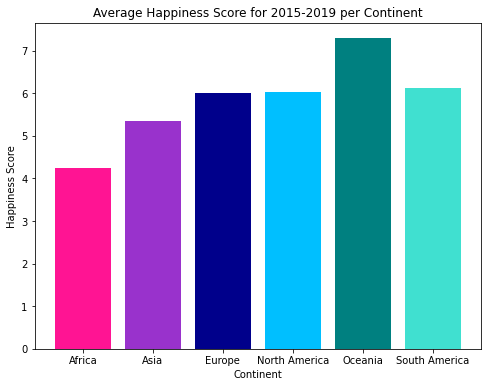

In [71]:
#Create a bar graph of average happiness score per continent from 2015 - 2019
y = happiness_df.groupby('Continent').mean()['Happiness Score'] #Average happiness score is calculated for each continent
x = y.index #Continents

#Bar graph features
plt.figure(figsize=(8,6))
plt.bar(x, y, color = continent_colors, width = 0.8)
plt.title('Average Happiness Score for 2015-2019 per Continent')
plt.ylabel('Happiness Score')
plt.xlabel('Continent')

plt.show()

From this visual, it is quite apparent that Oceania has a significant lead on the other countries with an average Happiness Score over 7. Europe, North America, and South America almost precisely mirror each other in their average score at about 6. However, Africa's average Happiness Score is significantly lower than those of other continents landing at almost exactly 3 values lower than the maximum average value. It is also important to note that the highest average reached was still 3 values away from the highest possible value of 10 and the lowest average was only slightly above 4 values from the lowest possible value. A majority of continents however remained in the middle of the "ladder" at average scores close to 5/6. 

This graph is obviously not the complete picture we are looking for. In fact, it strengthens our case for a further examination: why are Oceania's values high and Africa's value significantly low in comparison? Are the averages for any continent significantly high or low due to one year of skewed data? Are certain countries strong contributors for a pull in either direction? 
This first visual mostly serves as a starting point for our data visualization and analysis process and we will attempt to examine/answer these questions in the subsequent steps. 

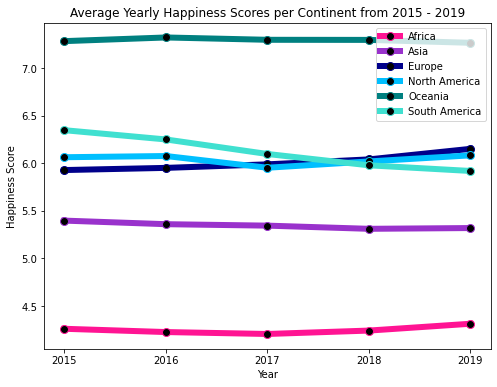

In [72]:
#Alphabetical order of continents
continents_listed = happiness_df['Continent'].drop_duplicates().dropna().sort_values()

plt.figure(figsize=(8,6))

#Creates linepolit for change in Happiness Score for each continent 
for index, continent in enumerate(continents_listed): 
    x = happiness_df.groupby(['Continent', 'Year']).mean().loc[continent].index 
    y =  happiness_df.groupby(['Continent', 'Year']).mean().loc[continent]['Happiness Score'] 
    plt.plot(x, y, linewidth = 6, marker = 'o', markerfacecolor = 'black', color = continent_colors[index], markersize = 8)

#Plot line graph features
plt.ylabel('Happiness Score')
plt.xlabel('Year')
plt.title("Average Yearly Happiness Scores per Continent from 2015 - 2019")
plt.legend(continents_listed, loc = 'best')


plt.show()


We can begin to answer a few of our earlier questions by looking at the line graph above. This visual marks the change in average Happiness Scores from 2015 - 2019. It can be clearly seen that Oceania and Africa were not spiked by values from a certain year - each was respectively high and low throughout our monitored timespan. In fact, with exception to South America, most of the continents did not experience significant variation from 2015-2019. This hints to a possible pattern of answers - that for most countries, the average happiness score did not change much throughout the years. However, we should try examining this at a more microscopic level - it might be time to take a look at the data for individual countries. 

### Analysis of National Average Happiness Scores

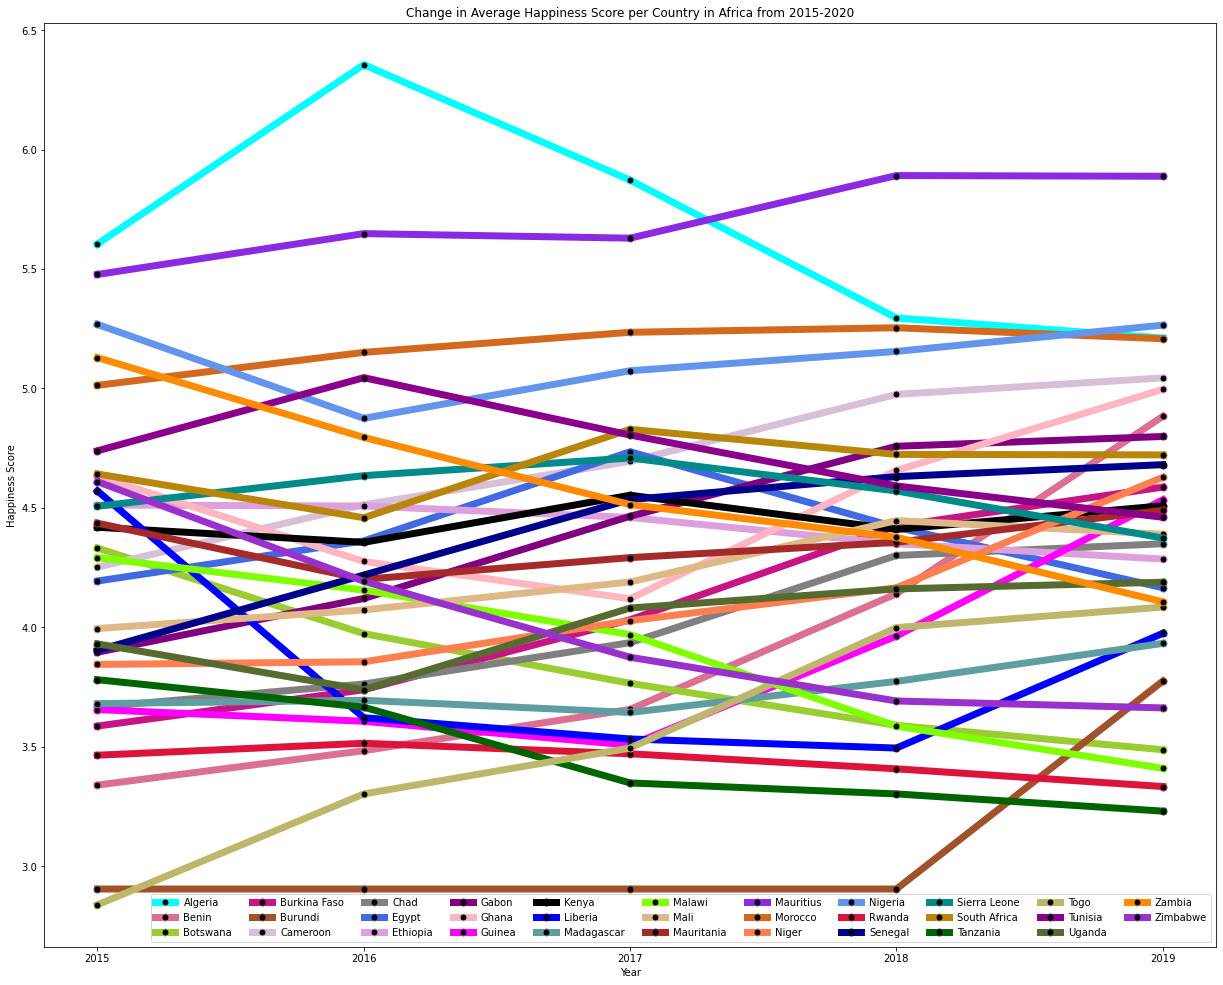

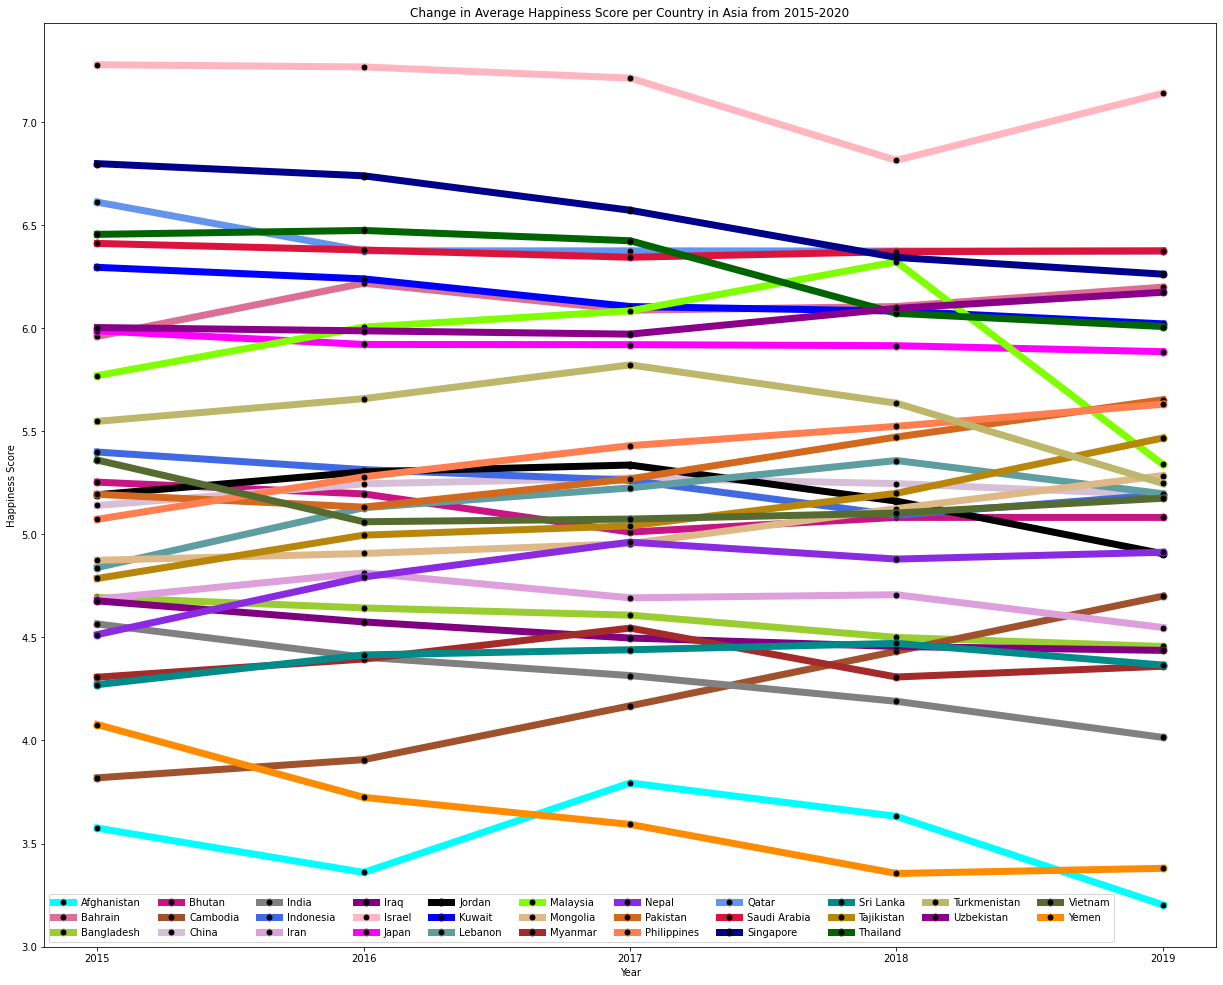

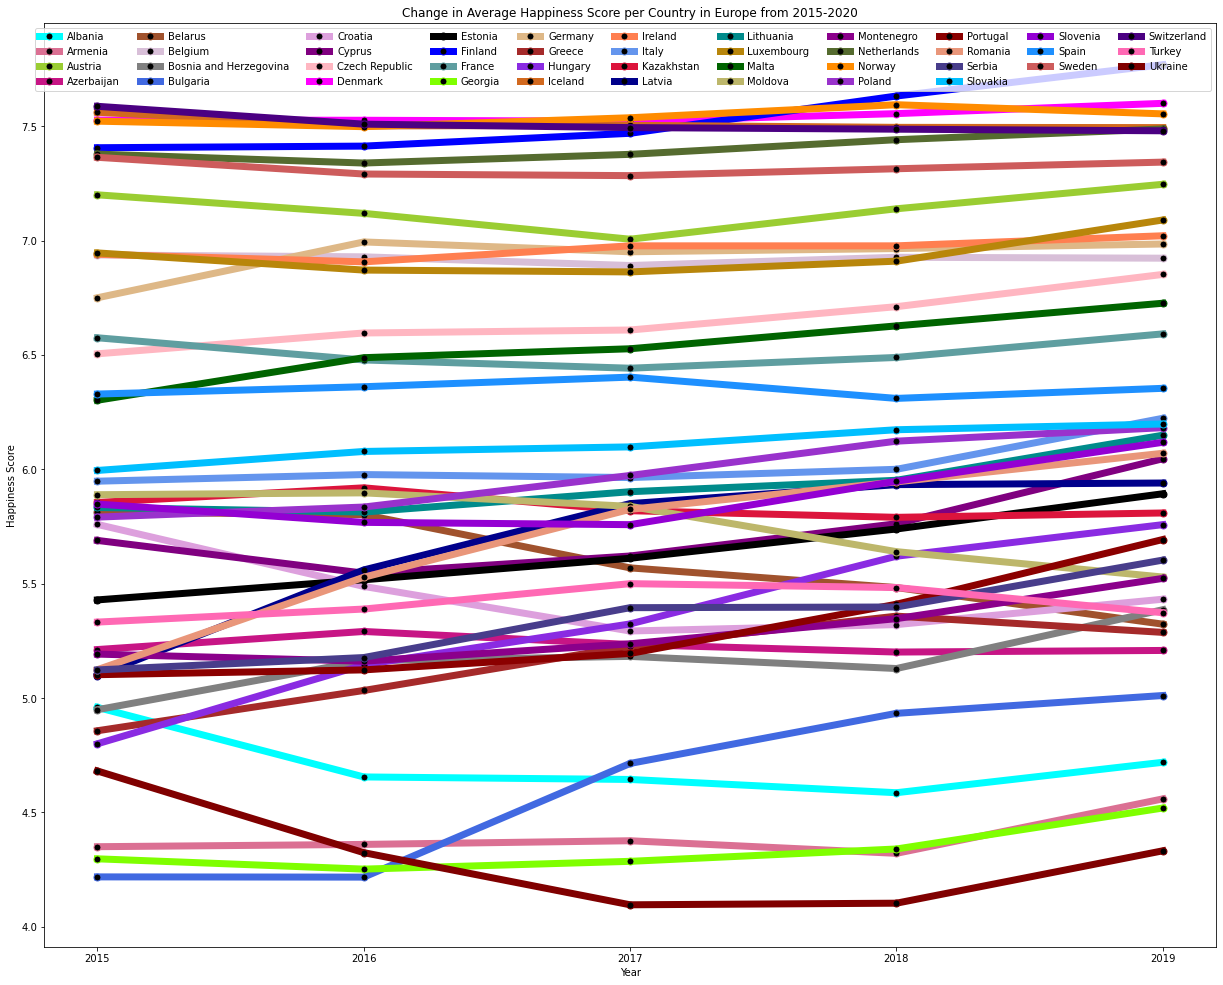

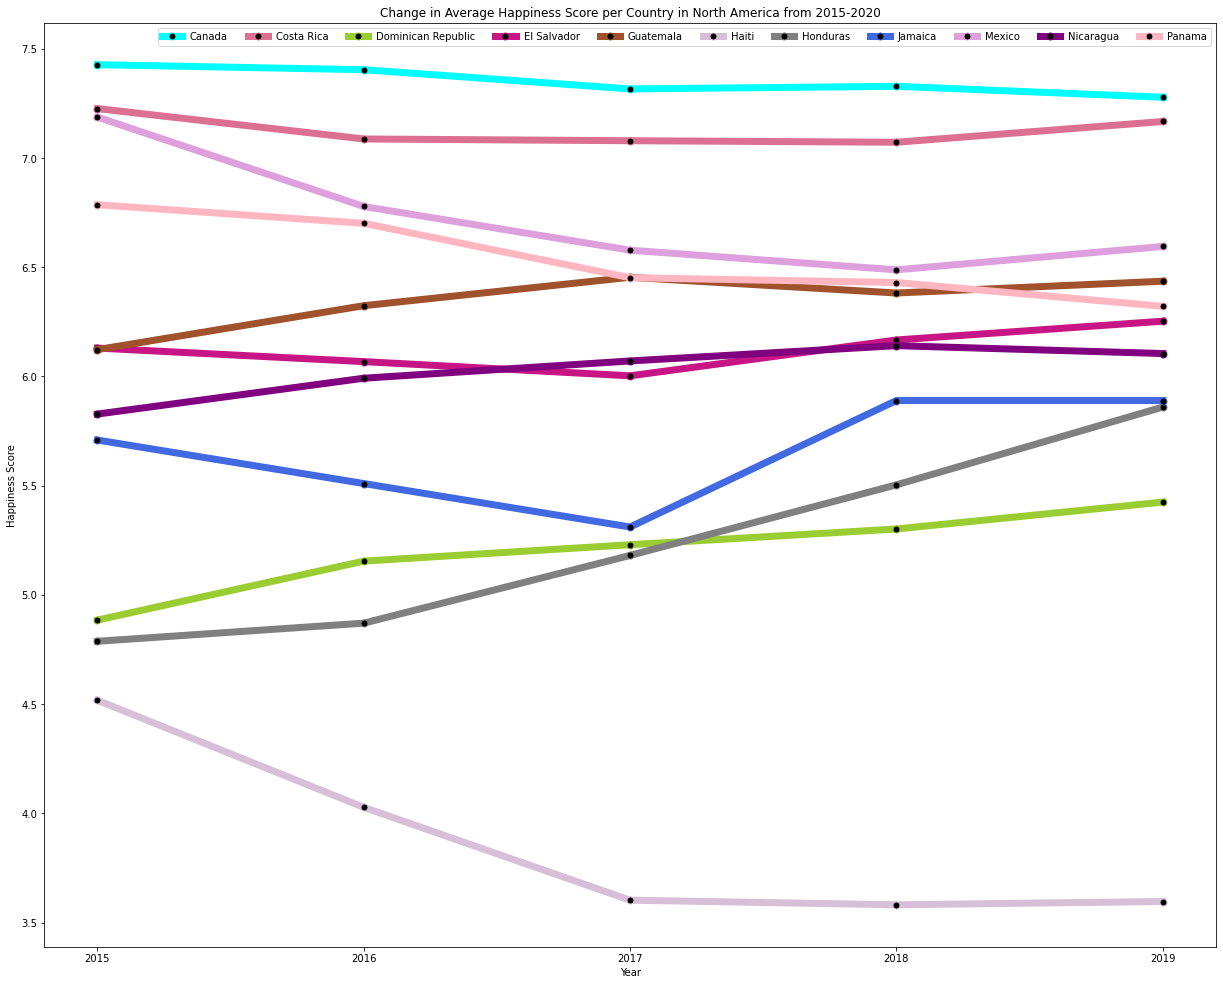

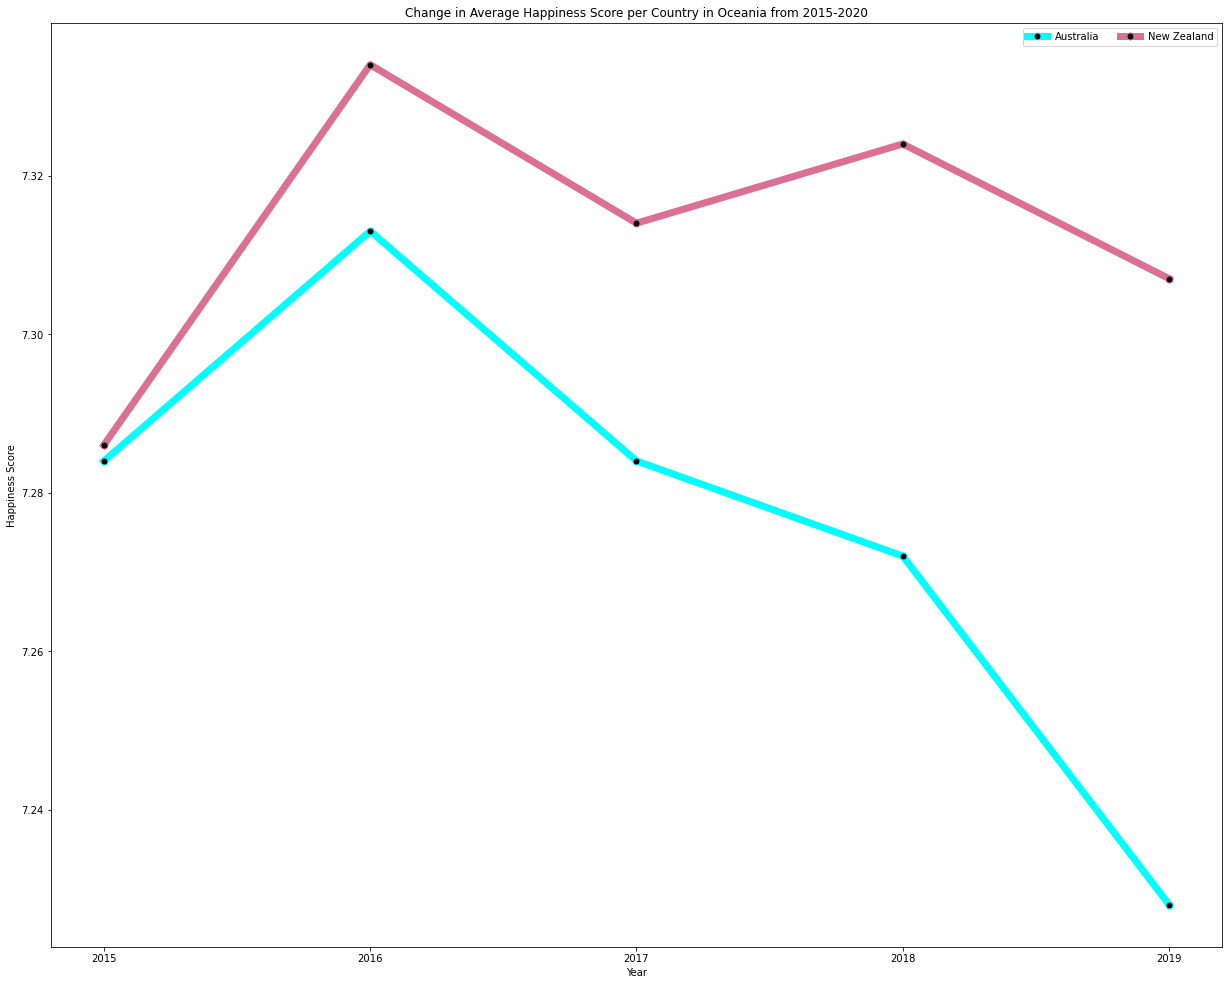

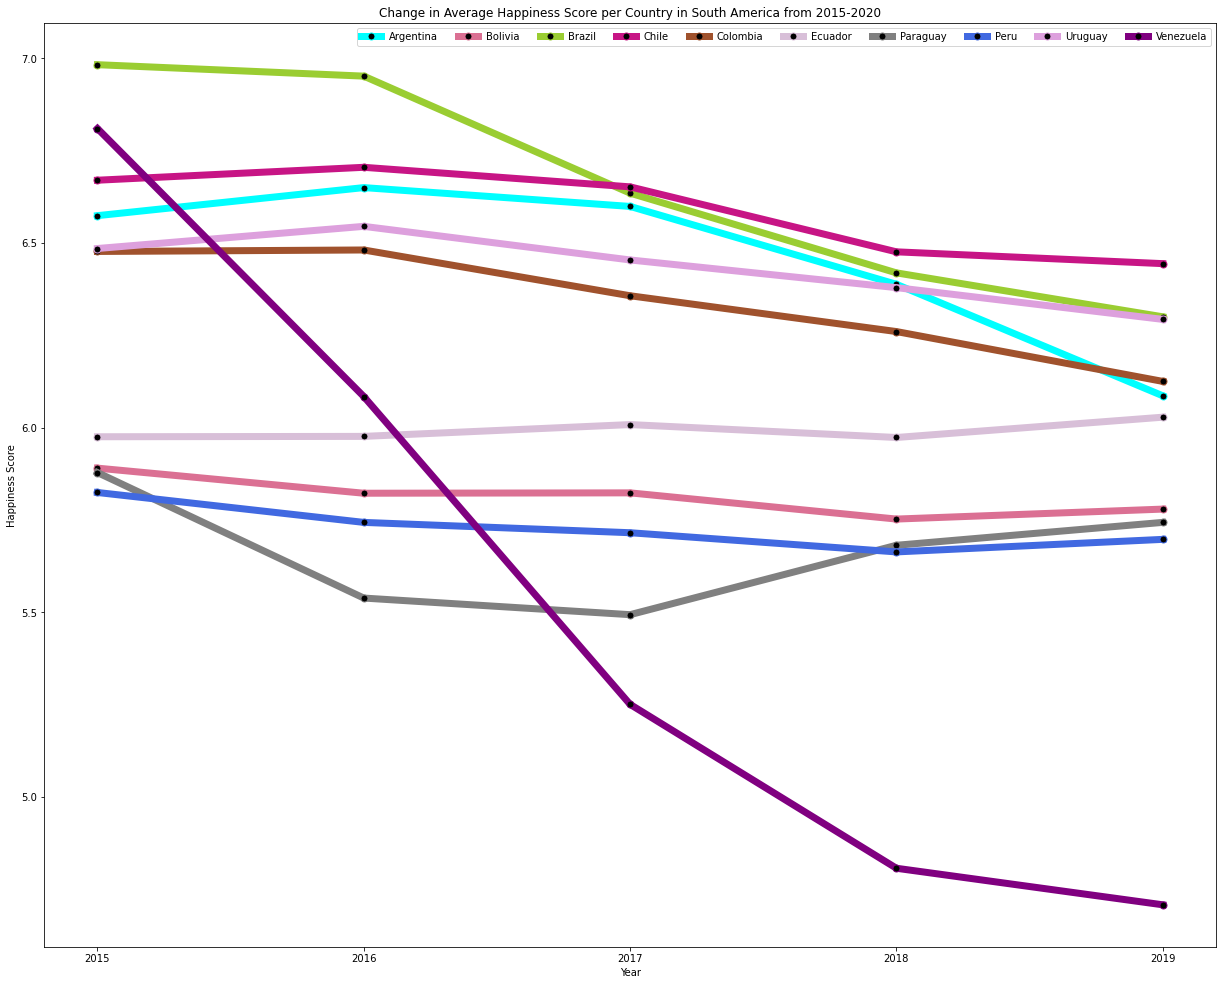

The following countries were excluded from the graphs because they did not contain data for all five years: 

['Angola', 'Central African Republic', 'Comoros', 'Djibouti', 'Gambia', 'Lesotho', 'Mozambique', 'Namibia', 'Somalia', 'South Sudan', 'Sudan', 'Swaziland', 'Hong Kong', 'Oman', 'Taiwan', 'United Arab Emirates', 'Macedonia', 'Belize', 'Puerto Rico', 'Trinidad and Tobago', 'Suriname']


In [73]:
#Plots a line graph capturing countries' change in Happiness Score from 2015-2019 for each continent 

excluded_countries = [] #List of countries that did not contain data from all five years 


for continent in continents_listed: #Iterates through continents

    countries = happiness_df.groupby(['Continent', 'Country', 'Year'])['Happiness Score'].mean().loc[continent]\
    .index.get_level_values('Country').drop_duplicates() #Holds list of countries in current continent

    plt.figure(figsize=(21,17))
    
    i = 0
    for country in countries: 
      
        y = (happiness_df.groupby(['Continent', 'Country', 'Year'])['Happiness Score'].mean().loc[continent][country])
        
        years = happiness_df.groupby(['Continent', 'Country', 'Year'])['Happiness Score'].mean().loc[continent][country]\
        .index.get_level_values('Year').drop_duplicates() #Years data was recorded for current country
        
        if len(years) != 5: #If data wasn't recorded for each year, this data is ommitted from  plot
            excluded_countries.append(country)
            continue 
        
        else: #Data was recorded for all five years and line plot for continent is generated including current country
            years = ['2015', '2016', '2017', '2018', '2019'] 
            plt.plot(years, y, linewidth = 7, marker = 'o', markerfacecolor = 'black', markersize = 7, color = c[i], 
                     label = country)
            plt.title('Change in Average Happiness Score per Country in ' + continent + ' from 2015-2020')
            plt.ylabel('Happiness Score')
            plt.xlabel('Year')
            i += 1
    
    plt.legend(loc="best", ncol= 11)
    plt.show()
    
print("The following countries were excluded from the graphs because they did not contain data for all five years: \n")
print(excluded_countries)

Examining the above line graphs that outline various countries' change in Happiness Scores from 2015-2019, deepens our understanding of our data. Firstly, by looking at the plot for the continent Oceania, we can see that Oceania only included two countries whereas Africa, Europe, and Asia included upwards of 30. The two countries included were Australia and New Zealand, both of which had very high Happiness Score averages(consistently above 7.0) throughout the measured timespan. This provides context to the high overall average for the Oceania continent as this continent had a smaller population of countries to skew the average Happiness Score in either direction. Continents like Asia on the other hand, had a large amount of countries factoring into the overall Happiness Score average: according to the line graph, a significant amount of countries had countries whose Happiness Score did not dip below 5.0, and yet Asia's average Happiness Score was only slightly above 5. These line graphs are extremely helpful in identifying the pattern of individual countries and holds quite a significant amount of interesting data. Our findings are similar to what we found in the previous line graph: there were no dramatic changes in Happiness Score from one year to the next for a particular region/country - at most a there was a rise or dip of about 1/1.5 . 

However, after taking a look at these countries, we want to take a look at one more specific group: our highest performing countries. While we know that Oceania had the highest overall average, gauging the highest overall performing _*countries*_ is not as simple from the above plots. 

#### Analysis of Highest National Average Happiness Scores

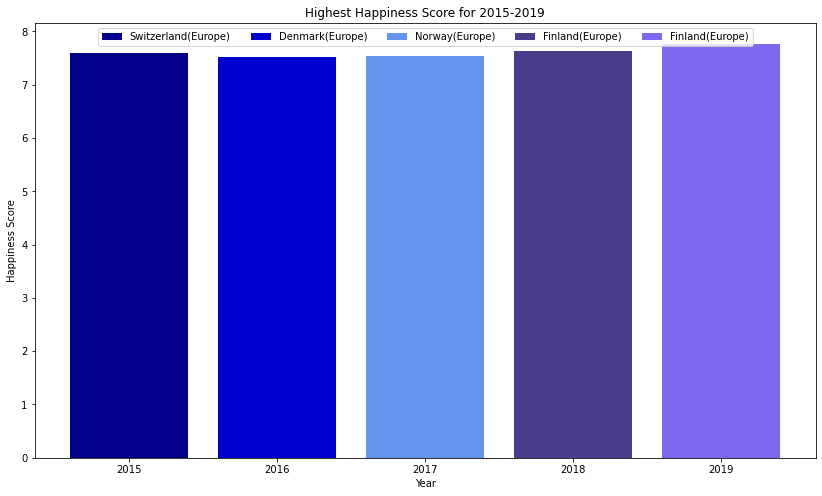

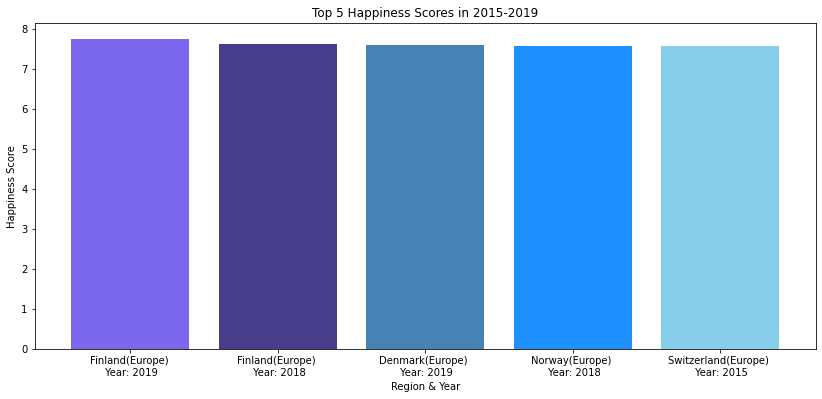

In [74]:
#Creates two bar plots, the first displaying the countries with the highest Happiness Score for each year and 
#the second displaying the 5 countries with the highest Happiness Score

plt.figure(figsize=(14,8))

#Plots highest performing country for each year in 2015-2019
for i, year in enumerate(years): 
    x = year
    high_val = happiness_df.sort_values(['Year', 'Happiness Score'], ascending = False).loc[happiness_df['Year'] ==
                                                                                            year].iloc[[0]]
    y = high_val['Happiness Score']
    country_continent = high_val['Country'].values[0] + "(" + high_val['Continent'].values[0] + ")"
    plt.bar(x, y, width = 0.8, label = country_continent, color = colors[i]) 
    
plt.legend(loc = 'upper center', ncol = 5)
plt.ylabel("Happiness Score")
plt.xlabel("Year")
plt.title('Highest Happiness Score for 2015-2019')
plt.show()

#Plots top 5 Happiness Scores and the countries that achieved them and the year they were achieved in 

highest_happiness = happiness_df.sort_values('Happiness Score', ascending = False)[0:5][['Year', 'Happiness Score', 
                                                                                         'Country', 'Continent']]
highest_happiness['Region & Year'] = highest_happiness['Country'] + '(' + highest_happiness['Continent'] + ") \
\n Year: " +highest_happiness['Year']
    
highest_happiness.plot(kind = 'bar', x = 'Region & Year', y = 'Happiness Score', figsize = (14, 6), legend = False, 
                       rot = 0, color = colors2, width = 0.8)

plt.title("Top 5 Happiness Scores in 2015-2019")
plt.ylabel("Happiness Score")
plt.show()

To paint a clearer picture about the Happiness in various countries, it was important that we look at our top performers from the data we have. The first plot gives us information regarding the countries that had the highest Happiness Score in each year whereas the second graph illustrates which countries (and in which year) achieved the top 5 highest Happiness Scores. To understand the performance of the countries, taking a look at both graphs in conjunction helps us to realize that it would not be enough to simply look at the top 5 countries - doing so would assume that the year played no role in the Happiness Score result. However, given that the 4/5 of the countries in the top 5 were from 2018-2019, it is clear that an assumption that year does not affect the score is unsafe to make. 

From the first plot and the second, we can see that Finland achieved the highest Happiness Score in 2019. In fact, Finland appeared twice in the first graph meaning that for two consecutive years(2018-2019), it was the top performing country for that year. Finland also made it in to the top 5 for the two aforementioned years. Another interesting aspect of this data is that in both graphs we can see that all the countries that had the highest Happiness Scores, were in Europe. This is especially interesting since Oceania outperformed Europe as a whole in terms of highest average Happiness Score. This circles back to our previous assertion that Oceania's average values were high largely due to the reason that Oceania consists of only two countries. 


However, this raises the question as to whether these countries' fluctuation or lack thereof mirrored a similar pattern in our social and economic variables: GDP per Capita, Social Support, Health(Life Expectancy), Freedom of Life Choices, Generosity, Perceptions of Corruption. We will examine these variables next. 

### Analysis of Social & Economic Factors' Influence on Happiness Scores

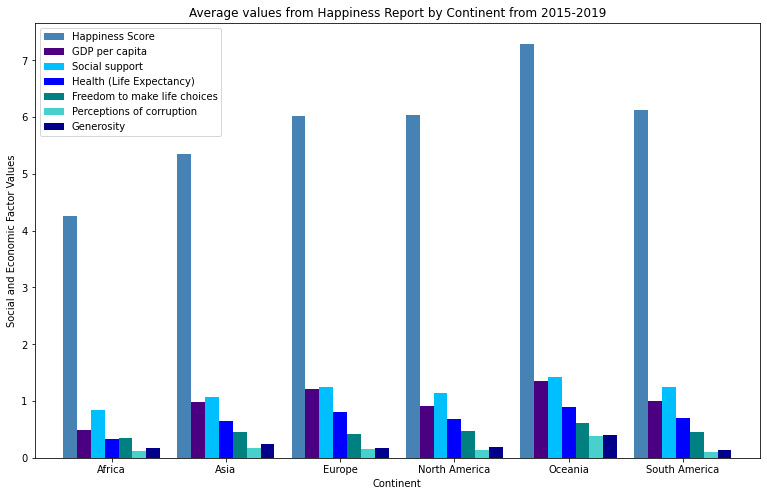

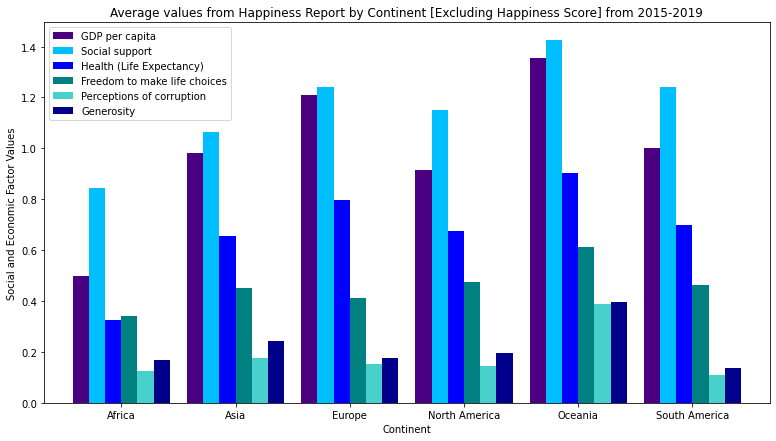

In [75]:
#Graphs bar plot of average values for predictor variables and happiness score
(happiness_df.drop(['Country', 'Year'], axis = 1)).groupby('Continent').mean().plot(kind = 'bar', width = .85, rot = 0, 
                                                                                    figsize=(13,8), color = my_colors)
plt.title('Average values from Happiness Report by Continent from 2015-2019')
plt.ylabel('Social and Economic Factor Values')
plt.show()

#Graphs bar plot of average values for only the predictor variables
(happiness_df.drop(['Country', 'Year', 'Happiness Score'], axis = 1)).groupby('Continent').mean().plot(kind = 'bar', 
                                                    figsize=(13,7), width = .85, rot = 0, color = my_colors[1:7])
plt.title('Average values from Happiness Report by Continent [Excluding Happiness Score] from 2015-2019')
plt.ylabel('Social and Economic Factor Values')


plt.show()

These above visuals display the average values of the variables we were considering as potential Happiness indicators per continent over the years 2015-2019. The first plot includes the average Happiness Score for easy similtaneous comparison. By looking at these two graphs in conjunction, we can see that Oceania not only had the highest average Happiness Score values but also the highest average values for all other variables as well. Likewise, Africa's predictor variables had values that were the lowest for all categories except perceptions of corruption and generosity (these values appeared to be relatively close to those of other continents). This trend suggests that there there could possibly a relationship between these 6 variables and Happiness Score. However, before any substantial claims or hypotheses are formed, we must investigate further. 

This graph also illustrates that social support was very high for all continents, with a difference of about .6 between the max and min values. Another noticeable point is that Oceania, the country with the highest Happiness Score, also had a generosity value that was higher than other continents (most continents' generosity value fell at or under .2 whereas Oceania's generosity value was closer to 0.4). While previous graphs depicted that Europe and North America coincided quite closely in terms of Happiness Score values, the above graphic showsthat GDP per capita, Social support, and Health (Life Expectancy) values'differed more significantly. To see whether these other variables have a significant effect/influence in the average Happiness Score of a continent, we can take a look at how well these values serve as predictor variables by creating a regression model. 

*** 

## Machine Learning 

The final step of our process is the machine learning phase. This step allows us to use statistical and predictive tools and models to further our analysis and solidify our claims and observations.

### Social & Economic Factors Model
We begin by deeming all 6 variables from above as independent variables and Happiness Score as our dependent variable. Then we fit a linear model to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. 

In [76]:
#Create a Linear Regression Object using sklearn.linear_model
reg = linear_model.LinearRegression() 

X = happiness_df.drop(['Country', 'Year', 'Continent', 'Happiness Score'], axis = 1) #Independent/Predictor variables
y = happiness_df['Happiness Score'] #Dependent Variable

reg.fit(X, y) #Creates fitted model

pred = reg.predict(X) #Predicted values

print("Mean Squared Error: " + str(np.sqrt(mean_squared_error(y, pred)))) #The lower the value the better the fit
print("Prediction Accuracy of model: " + str(r2_score(y, pred) * 100) + "%") 

Mean Squared Error: 0.5513945734878586
Prediction Accuracy of model: 76.58420543672652%


The regression model above showcases that collectively these 6 variables can serve as Happiness indicators: they are able to predict the Happiness Score with approximately 76% accuracy. However, our graph earlier indicated that some variables such as social support and Health(Life Expectancy) varied directly with Happiness Score and a regression model of these variables individually can reveal if these are better predictors. So, next we will take a look at how well each of the 6 predictor variables serve as individual Happiness indicators. 

#### Social & Economic Factors - Individually Modeled  

In [77]:
#Creates a regression model and fit for each independent variable
for var in (happiness_df.drop(['Country', 'Continent', 'Year', 'Happiness Score'], axis = 1)).columns: 
    reg_v = linear_model.LinearRegression()
    X_v = np.array([[ele] for ele in happiness_df[var]])
    y_v = happiness_df['Happiness Score']

    reg_v.fit(X_v, y_v)

    pred_v = reg_v.predict(X_v)
    print(var + " Prediction Accuracy: " + str(r2_score(y_v, pred_v) * 100) + "%") #The closer to 100% the better the fit


GDP per capita Prediction Accuracy: 63.006679273593626%
Social support Prediction Accuracy: 41.558356224090375%
Health (Life Expectancy) Prediction Accuracy: 56.269626535209596%
Freedom to make life choices Prediction Accuracy: 31.024402692958162%
Perceptions of corruption Prediction Accuracy: 10.682788437431867%
Generosity Prediction Accuracy: 3.9549836667618354%


As we can see from the results of the regression models above, the social demographics that these variables represent, don't significantly influence the level of Happiness in countries as individual components. In other words, based on our understanding of the World Happiness Report data from 2015-2019, we cannot conclude that high or low levels of Social support, Health, etc. contribute to parallel Happiness levels in a country. 

> #### Social & Economic Ranking of Countries with Highest Happiness Score Values
> We also can take a look at where each of our top performing countries by year ranked in GDP per capita and Health(Life       Expectancy) to see if our two varibles with the highest accuracy rating were good predictors for the countries with very high Happiness Scores. 

In [78]:
# GDP and Life Expectancy are highest indicators, see if Finland is at top when sorting by that
top_countries = [('Switzerland', '2015'), ('Denmark', '2016'), ('Norway', '2017'), ('Finland', '2018'), ('Finland', '2019')]

print("\n Top performing countries by year: \n" + str(top_countries) + "\n")

#Calculate GDP per capita rank and Health(Life Expectancy) rank for top-performing country for each year  
for (country, yr) in top_countries: 
    top_gdp = happiness_df.groupby('Year').get_group(yr).sort_values('GDP per capita', ascending = False).reset_index()
    top_health = happiness_df.groupby('Year').get_group(yr).sort_values('Health (Life Expectancy)', \
                                                                        ascending = False).reset_index()
    
    print(country + " was #" + str(top_gdp[top_gdp['Country'] == country].index[0]) + " in highest GDP per capita and #" + 
        str(top_health[top_health['Country'] == country].index[0]) + " in highest life expactancy for " + yr + ".")


 Top performing countries by year: 
[('Switzerland', '2015'), ('Denmark', '2016'), ('Norway', '2017'), ('Finland', '2018'), ('Finland', '2019')]

Switzerland was #6 in highest GDP per capita and #7 in highest life expactancy for 2015.
Denmark was #15 in highest GDP per capita and #26 in highest life expactancy for 2016.
Norway was #5 in highest GDP per capita and #23 in highest life expactancy for 2017.
Finland was #20 in highest GDP per capita and #22 in highest life expactancy for 2018.
Finland was #21 in highest GDP per capita and #25 in highest life expactancy for 2019.


> As we can see, most of the top performing countries ranked within the top 25. Nevertheless, our previous sentiment is reiterated as we can see that look at individual variables as indicators will not suffice and a more holistic understanding of each country is needed to disect the levels of Happiness; therefore, it is best to take a look at all 6 variables in conjunction.


### 2019 Happiness Score Model
As we were discussing throughout this project, it is also worth our time to dive further into how the data evolves each year. We have touched on the observation that the Happiness Scores remains fairly consistent throughout the years. A more concrete way to test this is to create a regression model examining how well the Happiness Scores for 2015-2018 predict the Happiness Scores for 2019. 

In [79]:
#Creates a regression model predicting 2019 values from 2015-2018 Happiness Scores
reg2 = linear_model.LinearRegression() 


#Create a new dataframe that contains Happiness Scores for each country for each year 2015-2018
df = pd.DataFrame() 
df['Country'] = happiness_df['Country'].drop_duplicates()


df['2015'] = happiness_df.groupby('Year').get_group('2015')['Happiness Score']
for yr in years[1:5]:
    df = df.merge(happiness_df.groupby('Year').get_group(yr)[['Country', 'Happiness Score']], how = 'outer')
    df.rename(columns = {'Happiness Score': yr}, inplace = True)

df.dropna(inplace = True)


#Creates regression model 
X2 = df.drop(['Country', '2019'], axis = 1)
y2 = df['2019']
reg2.fit(X2, y2)

pred2 = reg2.predict(X2)
pred2

df['2019 (Predicted)'] = pred2
df['Residuals'] = y2 - pred2

print("Coefficients of linear model in order of year are: "  + str(reg2.coef_))
print("Prediction Accuracy: " + str(r2_score(y2, pred2) * 100) + "%")  

df #Displays dataframe with Happiness Score values from 2015-2019 and Predicted 2019 Values



Coefficients of linear model in order of year are: [ 0.14042797 -0.16148216 -0.41019715  1.40846399]
Prediction Accuracy: 97.20766702679664%


,Country,2015,2016,2017,2018,2019,2019 (Predicted),Residuals
0,Afghanistan,3.575,3.360,3.794,3.632,3.203,3.674431,-0.471431
1,Albania,4.959,4.655,4.644,4.586,4.719,4.654671,0.064329
2,Algeria,5.605,6.355,5.872,5.295,5.211,4.965746,0.245254
4,Argentina,6.574,6.650,6.599,6.388,6.086,6.295422,-0.209422
5,Armenia,4.350,4.360,4.376,4.321,4.559,4.353477,0.205523
...,...,...,...,...,...,...,...,...
144,Venezuela,6.810,6.084,5.250,4.806,4.707,4.745128,-0.038128
145,Vietnam,5.360,5.061,5.074,5.103,5.175,5.197212,-0.022212
146,Yemen,4.077,3.724,3.593,3.355,3.380,3.378451,0.001549
147,Zambia,5.129,4.795,4.514,4.377,4.107,4.414893,-0.307893


As we can see by the high accuracy of the model, that the data from 2015-2019 follows a strong linear trend. Using the coeffecients printed above, we could calculate 2019's Happiness Scores using only the values from 2015-2018. We can test our model even further by incorporating data from 2020.  

### 2020 Happiness Score Model
Circling back to the data collection and tidying steps that we discussed in the beginning of this project, we demonstrate a very normal occurrence in the data science pipeline - a repetition of previous steps of the cycle. We process the WHR 2020 data and prepare it for analysis. 

In [80]:
#Data Collection
WHR_2020 = pd.read_csv('2020.csv')
WHR_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


Next, we can create a similar regression model that we did above, utilizing the Happiness Scores from years 2015-2019 to predict the Happiness Score values for 2020. 

In [81]:
#Data Tidying
WHR_2020.drop(['Regional indicator', 'upperwhisker', 'lowerwhisker', 'Standard error of ladder score', 
               'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support',
               'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 
               'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'], 
              axis = 1, inplace= True)

WHR_2020.rename(columns = {'Ladder score': 'Happiness Score', 'Country name': 'Country','Healthy life expectancy': 
                           'Health (Life Expectancy)'}, inplace = True)
    

WHR_2020.dropna(inplace = True)

df = df.merge(WHR_2020[['Country', 'Happiness Score']], how = 'outer')
df.rename(columns = {'Happiness Score': '2020'}, inplace = True)
df.dropna(inplace = True)
df

,Country,2015,2016,2017,2018,2019,2019 (Predicted),Residuals,2020
0,Afghanistan,3.575,3.360,3.794,3.632,3.203,3.674431,-0.471431,2.5669
1,Albania,4.959,4.655,4.644,4.586,4.719,4.654671,0.064329,4.8827
2,Algeria,5.605,6.355,5.872,5.295,5.211,4.965746,0.245254,5.0051
3,Argentina,6.574,6.650,6.599,6.388,6.086,6.295422,-0.209422,5.9747
4,Armenia,4.350,4.360,4.376,4.321,4.559,4.353477,0.205523,4.6768
...,...,...,...,...,...,...,...,...,...
123,Venezuela,6.810,6.084,5.250,4.806,4.707,4.745128,-0.038128,5.0532
124,Vietnam,5.360,5.061,5.074,5.103,5.175,5.197212,-0.022212,5.3535
125,Yemen,4.077,3.724,3.593,3.355,3.380,3.378451,0.001549,3.5274
126,Zambia,5.129,4.795,4.514,4.377,4.107,4.414893,-0.307893,3.7594


In [82]:
#Regression Model for 2020 - examining how well 2015-2019 predict 2020
reg3 = linear_model.LinearRegression() 

X_2020 = (df.drop(['Country'], axis = 1))
X_2020.isnull().sum().sum()
y_2020 = df['2020']

reg3.fit(X_2020, y_2020)

pred3 = reg3.predict(X_2020)
pred3

print("Accuracy of 2020 Regression Model: " + str(r2_score(y_2020, pred3) * 100) + "%") #Accuracy of model

Accuracy of 2020 Regression Model: 100.0%


The results of this model are extremely interesting: Happiness Scores from 2015-2019 were 100% accurate in predicting 2020's Happiness Scores. Based on our data and further examination of the World Happiness Report from 2020, we can gather that given the complications of 2020 data actually wasn't collected for the year. Instead, the Happiness Scores recorded in the report were calculated from a regression model much like ours. This serves as an insightful and significant close to our analysis as it demonstrates the strong significance and high value of regression models, specifically the one that we collected for predicting 2019's Happiness Score data. 

***
## Conclusion 

Given the strain the pandemic that unaviodably created complications around the world, our analysis was primarily focused on data from the years 2015-2019. Happiness, as we and the mission of the WHR parallely established, is a very complicated emotion that can be influenced by many factors. In our analyis of Happiness, we were dissecting it on a very large scale and therefore had to channel our focus to factors on a macro level, centering our project around the examination of various social and economic indicators. 

As we saw in our data visualization process, sometimes graphs and subsets of data do not tell a full story. However, we were able to gather that Oceania had the highest average levels of Happiness. That region may only include a small collection of countries, but it is worth noting that each of these countries remained at the higher end of the Happiness "ladder" throughout the monitored timespan. Furthermore, this high level of Happiness in context to the social and economic prosperity as indicated by the data provides an overall complimentary reputation to this region for sustaining a high level of Happiness. Our visuals also were able to help us in understanding that overall, according to the data collected by the World Happiness Report from years 2015-2019, that a large majority of continents on Earth (arguably, a majority of countries as well) host individuals that generally speaking relatively happy, meaning the average score is above a 5 which is the midpoint on the ladder scale utilized by GWP. Lastly, a glance at our high performers (who are all countries from Europe), will lead one to quickly jump to the conclusion that Europe fosters Happiness moreso than other continents. However, taking a look at the continental average Happiness Scores in conjunction with our social and economic indicators will reveal that Europe, North America, and South America are extremely close in almost all categories. This would lead one to assume that it isn't the continent, but the specific countries of Switzerland, Denmark, Norway, and Finland are the reason for the repeatedly top rankings in terms of levels of Happiness. The fact that these countries did not significantly outrank other countries in GDP per capita or Health(Life Expectancy) indicates that while these social and economic indicators are important, they are not always the singular contributors to individuals' Happiness. The Happiness in these countries are high for reasons that are special to these countries. 

We also used Machine Learning to examine our data at a higher level through regression models. We first built a model that revealed how strongly our social and economic factors were indicators of national Happiness Score values. As we've discussed, these values collectively piece together strong context for either low or high Happiness values but cannot be used individually or as sole indicators for Happiness. In other words, economic indicators alone or social indicators alone are not definitive influencers of Happiness in a region. This shed a valuable and interesting light on various regions that social scientists and/or other research can explore further in terms of understanding the true effect elements such as money and family support play on an individual's personal Happiness. Questions, that lay beyond the scope of this project, can stem from our findings such as "does the absence of family support influence an individual's level of Happiness moreso than the presence of family support?" Similarly, the 6 variables that we examined cannot be labeled as the "sole indicators" for Happiness: if this were so, our accuracy rate would have been much higher than it was. However, our accuracy percentage makes sense in the context of the emotion we are discussing: there isn't one standard criteria that can be used to formulate Happiness. Therefore, even though countries may have high GDP per capita or high values of familial support and yet were lower in Happiness and vice versa. However, as this project has revealed, these can be useful stepping stones for a further examination into the depth of these indicators and the role they play in various countries and various individuals' lives. 

Lastly, we utilized Machine Learning to examine how much Happiness fluctuated for various countries. We developed a model that could predict the Happiness Score for each country in 2019, based on the Happiness Score values of 2015-2018 with a 97% accuracy. This is a significant revelation in the possible solidity of this emotion/state and commentary on how people in various regions harbor emotions in a collective manner. Finally, we got to look at the significance and value of our analysis and findings on a larger scale. By connecting our data to 2020, we were firstly attempting to utilize our knowledge of existing data to draw conclusions about 2020 if the year had played out differently. However, finding that the World Happiness Report used the data from 2015-2019 to calculate Happiness Score values for 2020, soldifies the value of our dataa analysis and discussion of Happiness throughout this project, leaving us with confidence of a firm understanding of our data. 

In an even more significant extension, it also highlights the increasing value of Machine Learning in modern day. The World Happiness Report publication of the 2020 report which includes a thorough discussion and analysis of the data based solely on Happiness Score values from 2015-2019 instead of values attained by a survey, is a nod to the value and power of the regression model that we attained for 2019 and hints to increased future collaboration of social, computer, and data scientist in developing models and pursuing projects much like ours. 